In [1]:
#importing libraries

In [124]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

print("Setup Complete")

Setup Complete


In [125]:
#read data
dataframe=pd.read_csv('Bondora_raw.zip')

In [126]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [127]:
#Finding nulls and dropping features with more than 30% nulls

In [128]:
nulls=[]

In [129]:
def null_values() :  
    lst = dataframe.isnull().sum()
    for i in range(len(lst)) :
        if lst[i] != 0 :
           x= lst[i]
           col = dataframe.columns[i]
           y= (x/dataframe.shape[0])*100
           if y >= 30:
              nulls.append(col)

           print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")
null_values()

col num : 12 /  ContractEndDate / 75546 nulls /56.16 %
col num : 18 /  VerificationType / 45 nulls /0.03 %
col num : 22 /  Gender / 45 nulls /0.03 %
col num : 28 /  MonthlyPayment / 6685 nulls /4.97 %
col num : 29 /  County / 36840 nulls /27.38 %
col num : 30 /  City / 9794 nulls /7.28 %
col num : 32 /  Education / 45 nulls /0.03 %
col num : 33 /  MaritalStatus / 45 nulls /0.03 %
col num : 34 /  NrOfDependants / 98929 nulls /73.54 %
col num : 35 /  EmploymentStatus / 197 nulls /0.15 %
col num : 36 /  EmploymentDurationCurrentEmployer / 876 nulls /0.65 %
col num : 37 /  EmploymentPosition / 98439 nulls /73.17 %
col num : 38 /  WorkExperience / 98007 nulls /72.85 %
col num : 39 /  OccupationArea / 86 nulls /0.06 %
col num : 40 /  HomeOwnershipType / 1652 nulls /1.23 %
col num : 52 /  DebtToIncome / 45 nulls /0.03 %
col num : 53 /  FreeCash / 45 nulls /0.03 %
col num : 56 /  PlannedPrincipalTillDate / 80070 nulls /59.52 %
col num : 57 /  PlannedInterestTillDate / 3942 nulls /2.93 %
col nu

In [130]:
nulls

['ContractEndDate',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'StageActiveSince',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [131]:
dataframe=dataframe.drop(columns= nulls,axis=1)
dataframe

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0,NaN,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0,NaN,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0,NaN,NaN
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0,NaN,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0,NaN,NaN
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,NaN,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.0,60.0
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,0,NaN,NaN


In [132]:
dataframe['ReportAsOfEOD']= pd.to_datetime(dataframe['ReportAsOfEOD'],format="%Y-%m-%d")

dataframe['ReportAsOfEOD'].unique()

array(['2020-01-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [133]:
dataframe=dataframe.drop(columns='ReportAsOfEOD',axis=1)
dataframe

,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,...,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0,NaN,NaN
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,...,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0,NaN,NaN
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,...,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0,NaN,NaN
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,2009-06-13 12:01:20,...,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0,NaN,NaN
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,2009-06-10 10:17:13,...,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,2015-01-01 07:17:03,...,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0,NaN,NaN
134525,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,2015-01-05 07:56:22,...,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,NaN,NaN
134526,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,2014-12-28 15:01:47,...,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.0,60.0
134527,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,2015-01-05 15:01:18,...,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,0,NaN,NaN


In [134]:
#spiliting ( num , obj , bool ) 

In [135]:
obj_data=dataframe.select_dtypes('object')
num_dataframe=dataframe.drop(obj_data.columns,axis=1)
num_dataframe

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,659,0,0,115.0410,True,17,5,2.0,1,61,...,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,NaN,NaN
1,654,0,0,140.6057,False,20,4,2.0,1,48,...,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,NaN,NaN
2,641,0,0,319.5580,True,20,6,2.0,1,58,...,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,NaN,NaN
3,668,0,0,57.5205,True,12,7,2.0,1,23,...,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,NaN,NaN
4,652,0,0,319.5582,True,10,4,2.0,1,25,...,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,283484,2515,0,485.0000,True,16,6,3.0,4,37,...,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,NaN,NaN
134525,285168,1880,0,1120.0000,False,16,2,3.0,4,35,...,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,NaN,NaN
134526,281602,1975,0,525.0000,True,13,6,1.0,4,40,...,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.0,60.0
134527,285431,1840,0,1160.0000,False,16,2,4.0,1,47,...,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,NaN,NaN


In [136]:
bool_data= num_dataframe.select_dtypes('bool')
bool_data.isnull().sum()

NewCreditCustomer                    0
ActiveScheduleFirstPaymentReached    0
Restructured                         0
dtype: int64

In [137]:
#encoding bool data

label_encoder = preprocessing.LabelEncoder()

bool_data['NewCreditCustomer']= label_encoder.fit_transform(bool_data['NewCreditCustomer'])
bool_data['ActiveScheduleFirstPaymentReached']= label_encoder.fit_transform(bool_data['ActiveScheduleFirstPaymentReached'])
bool_data['Restructured']= label_encoder.fit_transform(bool_data['Restructured'])

bool_data

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,1,1,0
1,0,1,0
2,1,1,1
3,1,1,0
4,1,1,0
...,...,...,...
134524,1,1,0
134525,0,1,0
134526,1,1,0
134527,0,1,1


In [138]:
bool_data['NewCreditCustomer']

0         1
1         0
2         1
3         1
4         1
         ..
134524    1
134525    0
134526    1
134527    0
134528    0
Name: NewCreditCustomer, Length: 134529, dtype: int64

In [139]:
obj_data.isnull().sum()


LoanId                                   0
ListedOnUTC                              0
BiddingStartedOn                         0
UserName                                 0
LoanApplicationStartedDate               0
LoanDate                                 0
FirstPaymentDate                         0
MaturityDate_Original                    0
MaturityDate_Last                        0
DateOfBirth                              0
Country                                  0
County                               36840
City                                  9794
EmploymentDurationCurrentEmployer      876
LastPaymentOn                         9531
Rating                                2730
Status                                   0
CreditScoreEsMicroL                  29574
dtype: int64

In [140]:
#Filling missing data

In [141]:
obj_data=obj_data.fillna('unkown')

In [142]:
obj_data.isnull().sum()

LoanId                               0
ListedOnUTC                          0
BiddingStartedOn                     0
UserName                             0
LoanApplicationStartedDate           0
LoanDate                             0
FirstPaymentDate                     0
MaturityDate_Original                0
MaturityDate_Last                    0
DateOfBirth                          0
Country                              0
County                               0
City                                 0
EmploymentDurationCurrentEmployer    0
LastPaymentOn                        0
Rating                               0
Status                               0
CreditScoreEsMicroL                  0
dtype: int64

In [143]:
def fill_with_median(col,data):
    for i in col:
        median=data[i].median()
        data[i]= data[i].fillna(value=median,axis=0)
fill_with_median(num_dataframe.columns,num_dataframe)   

In [144]:
num_dataframe.isnull().sum()

LoanNumber                                0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
ApplicationSignedHour                     0
ApplicationSignedWeekday                  0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer     

In [145]:
num_dataframe

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,...,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,659,0,0,115.0410,True,17,5,2.0,1,61,...,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,3.0,60.0
1,654,0,0,140.6057,False,20,4,2.0,1,48,...,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,3.0,60.0
2,641,0,0,319.5580,True,20,6,2.0,1,58,...,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,3.0,60.0
3,668,0,0,57.5205,True,12,7,2.0,1,23,...,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,3.0,60.0
4,652,0,0,319.5582,True,10,4,2.0,1,25,...,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,3.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,283484,2515,0,485.0000,True,16,6,3.0,4,37,...,False,2308.1900,0.0000,0.00,0.00,0,0.0000,0,3.0,60.0
134525,285168,1880,0,1120.0000,False,16,2,3.0,4,35,...,False,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,3.0,60.0
134526,281602,1975,0,525.0000,True,13,6,1.0,4,40,...,False,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.0,60.0
134527,285431,1840,0,1160.0000,False,16,2,4.0,1,47,...,True,2257.5400,561.5300,0.00,0.00,1,500.0000,0,3.0,60.0


In [146]:
num_cat=num_dataframe[['Education','EmploymentStatus','HomeOwnershipType','LanguageCode','MaritalStatus','UseOfLoan']]

num_dataframe=num_dataframe.drop(num_cat,axis=1)
num_dataframe=num_dataframe.drop(bool_data.columns,axis=1)

In [147]:
num_dataframe

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,AppliedAmount,...,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,659,0,0,115.0410,17,5,2.0,61,1.0,319.5582,...,6.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,3.0,60.0
1,654,0,0,140.6057,20,4,2.0,48,1.0,191.7349,...,6.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,3.0,60.0
2,641,0,0,319.5580,20,6,2.0,58,1.0,319.5582,...,6.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,3.0,60.0
3,668,0,0,57.5205,12,7,2.0,23,1.0,127.8233,...,6.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,3.0,60.0
4,652,0,0,319.5582,10,4,2.0,25,1.0,319.5582,...,6.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,3.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,283484,2515,0,485.0000,16,6,3.0,37,0.0,3000.0000,...,1.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,3.0,60.0
134525,285168,1880,0,1120.0000,16,2,3.0,35,0.0,3000.0000,...,1.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,3.0,60.0
134526,281602,1975,0,525.0000,13,6,1.0,40,0.0,2500.0000,...,1.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.0,60.0
134527,285431,1840,0,1160.0000,16,2,4.0,47,1.0,3000.0000,...,1.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,3.0,60.0


In [148]:
#inding outliers and replace it with nearst value in range ( upper limit , lower limit )

In [149]:
def find_outliers_IQR(df_col,df):
    for i in df_col:
        q1=df[i].quantile(0.25)

        q3=df[i].quantile(0.75)

        IQR=q3-q1
        upper_lim=q3+1.5*IQR
        lower_lim=q1-1.5*IQR
        outliers = df[i][((df[i]<(q1-1.5*IQR)) | (df[i]>(q3+1.5*IQR)))]

        outliers_lower = df[i][((df[i]<(lower_lim)))]
        df[i][outliers_lower.index]=(q1-1.5*IQR)
        
   
   
        outliers_upper = df[i][((df[i]>(upper_lim)))]
        df[i][outliers_upper.index]=(q3+1.5*IQR)
      
     
        print(i)
        print(outliers.count() )
 


In [150]:
find_outliers_IQR(num_dataframe.columns,num_dataframe)

LoanNumber
0
BidsPortfolioManager
11204
BidsApi
23314
BidsManual
9748
ApplicationSignedHour
0
ApplicationSignedWeekday
0
VerificationType
0
Age
53
Gender
0
AppliedAmount
4816
Amount
4863
Interest
9881
LoanDuration
0
MonthlyPayment
6729
OccupationArea
24107
IncomeFromPrincipalEmployer
22901
IncomeFromPension
3953
IncomeFromFamilyAllowance
5910
IncomeFromSocialWelfare
1814
IncomeFromLeavePay
776
IncomeFromChildSupport
1306
IncomeOther
5524
IncomeTotal
6442
ExistingLiabilities
4230
LiabilitiesTotal
6780
RefinanceLiabilities
9308
DebtToIncome
31042
FreeCash
32868
MonthlyPaymentDay
0
PlannedInterestTillDate
17686
ExpectedLoss
5155
LossGivenDefault
0
ExpectedReturn
6220
ProbabilityOfDefault
2467
PrincipalOverdueBySchedule
25711
ModelVersion
4663
PrincipalPaymentsMade
17801
InterestAndPenaltyPaymentsMade
13032
PrincipalBalance
5663
InterestAndPenaltyBalance
26192
NoOfPreviousLoansBeforeLoan
9409
AmountOfPreviousLoansBeforeLoan
11378
PreviousEarlyRepaymentsCountBeforeLoan
6922
NextPaymentNr
12

In [151]:
def find_outliers_IQR(df_col,df):
    
    for i in df_col:
        q1=df[i].quantile(0.25)

        q3=df[i].quantile(0.75)

        IQR=q3-q1

        outliers = df[i][((df[i]<(q1-1.5*IQR)) | (df[i]>(q3+1.5*IQR)))]
        
        print(i)
        print(outliers.count() )
find_outliers_IQR(num_dataframe.columns,num_dataframe)

LoanNumber
0
BidsPortfolioManager
0
BidsApi
0
BidsManual
0
ApplicationSignedHour
0
ApplicationSignedWeekday
0
VerificationType
0
Age
0
Gender
0
AppliedAmount
0
Amount
0
Interest
0
LoanDuration
0
MonthlyPayment
0
OccupationArea
0
IncomeFromPrincipalEmployer
0
IncomeFromPension
0
IncomeFromFamilyAllowance
0
IncomeFromSocialWelfare
0
IncomeFromLeavePay
0
IncomeFromChildSupport
0
IncomeOther
0
IncomeTotal
0
ExistingLiabilities
0
LiabilitiesTotal
0
RefinanceLiabilities
0
DebtToIncome
0
FreeCash
0
MonthlyPaymentDay
0
PlannedInterestTillDate
0
ExpectedLoss
0
LossGivenDefault
0
ExpectedReturn
0
ProbabilityOfDefault
0
PrincipalOverdueBySchedule
0
ModelVersion
0
PrincipalPaymentsMade
0
InterestAndPenaltyPaymentsMade
0
PrincipalBalance
0
InterestAndPenaltyBalance
0
NoOfPreviousLoansBeforeLoan
0
AmountOfPreviousLoansBeforeLoan
0
PreviousEarlyRepaymentsCountBeforeLoan
0
NextPaymentNr
0
NrOfScheduledPayments
0


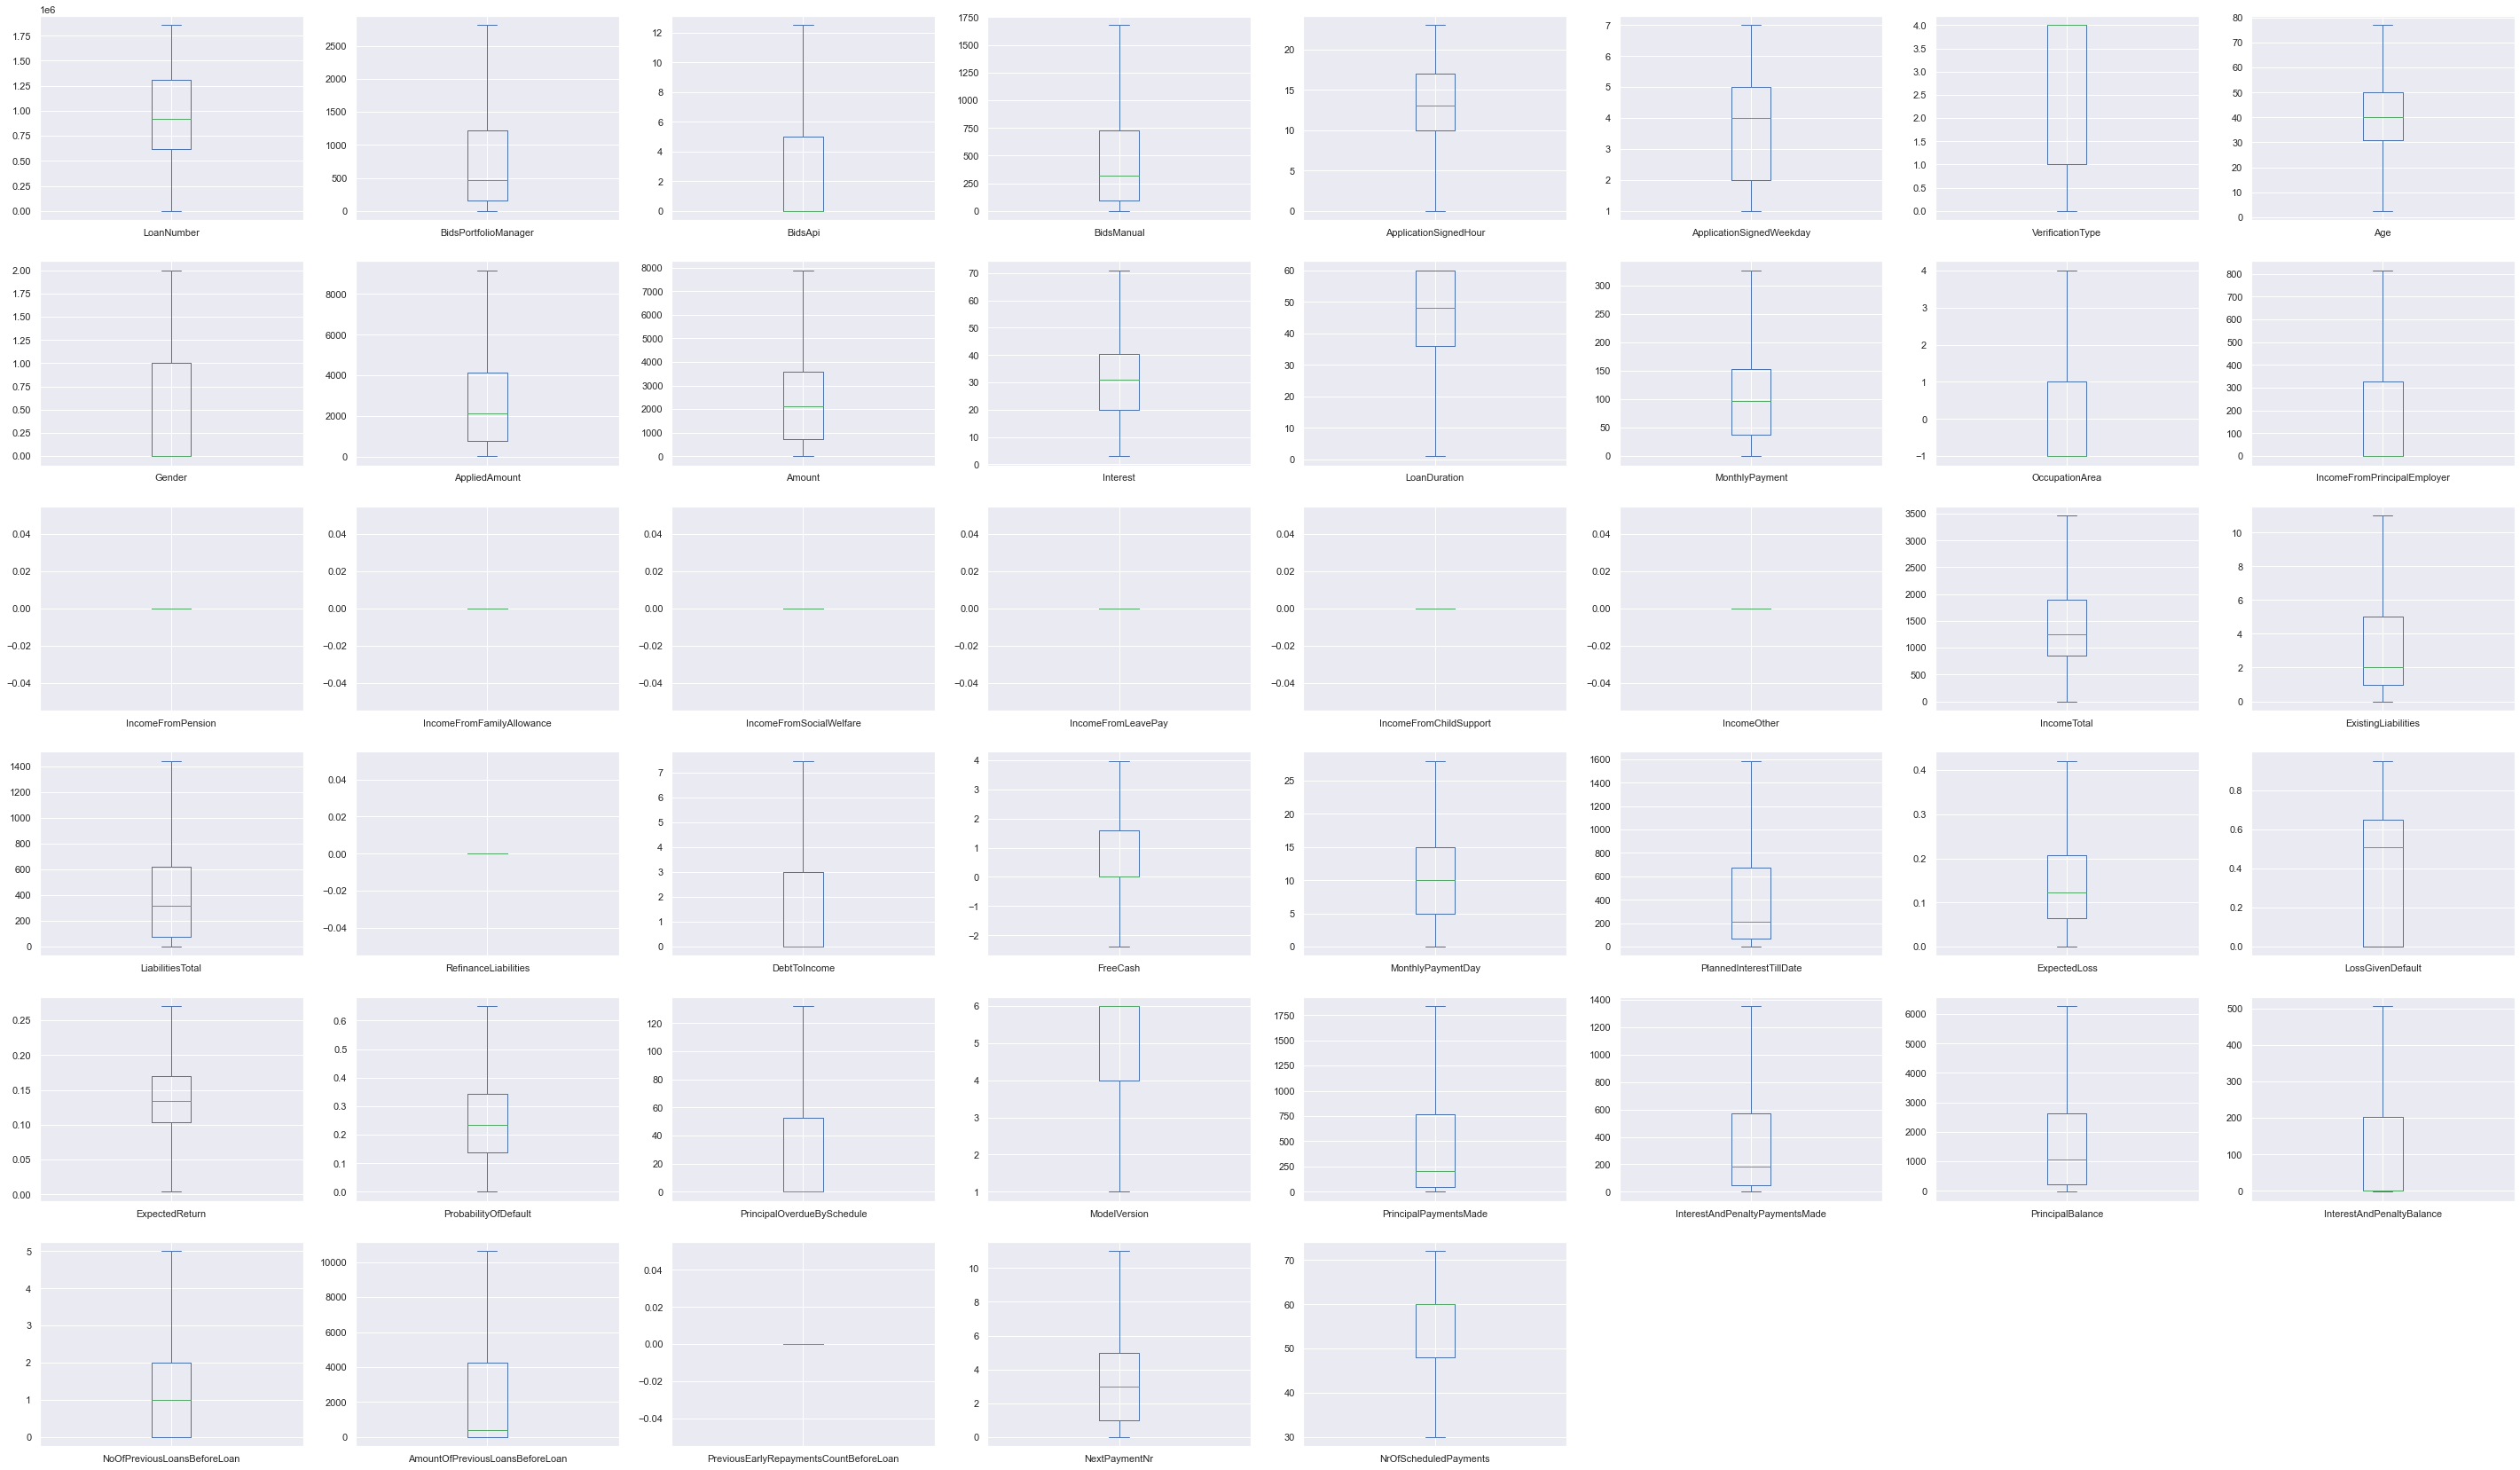

In [152]:
# plotting box plot for features 
num_dataframe.plot(kind='box', subplots=True,figsize=(50,50), layout=(10,8))
plt.show()

In [153]:
num_dataframe

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,Age,Gender,AppliedAmount,...,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments
0,659,0.0,0.0,115.0410,17.0,5.0,2.0,61.0,1.0,319.5582,...,6.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,3.0,60.0
1,654,0.0,0.0,140.6057,20.0,4.0,2.0,48.0,1.0,191.7349,...,6.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,3.0,60.0
2,641,0.0,0.0,319.5580,20.0,6.0,2.0,58.0,1.0,319.5582,...,6.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,3.0,60.0
3,668,0.0,0.0,57.5205,12.0,7.0,2.0,23.0,1.0,127.8233,...,6.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,3.0,60.0
4,652,0.0,0.0,319.5582,10.0,4.0,2.0,25.0,1.0,319.5582,...,6.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,3.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,283484,2515.0,0.0,485.0000,16.0,6.0,3.0,37.0,0.0,3000.0000,...,1.0,1839.7200,0.0000,0.00,0.00,0,0.0000,0,3.0,60.0
134525,285168,1880.0,0.0,1120.0000,16.0,2.0,3.0,35.0,0.0,3000.0000,...,1.0,1839.7200,1353.9300,0.00,0.00,1,3000.0000,0,3.0,60.0
134526,281602,1975.0,0.0,525.0000,13.0,6.0,1.0,40.0,0.0,2500.0000,...,1.0,1839.7200,199.3300,630.24,507.25,0,0.0000,0,0.0,60.0
134527,285431,1840.0,0.0,1160.0000,16.0,2.0,4.0,47.0,1.0,3000.0000,...,1.0,1839.7200,561.5300,0.00,0.00,1,500.0000,0,3.0,60.0


In [154]:
#visualizing range of borrow age and their genders

<AxesSubplot: xlabel='Age', ylabel='Density'>

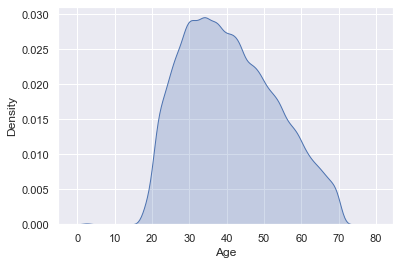

In [155]:
sns.set_theme(style="darkgrid")

sns.kdeplot(num_dataframe['Age'],shade=True)

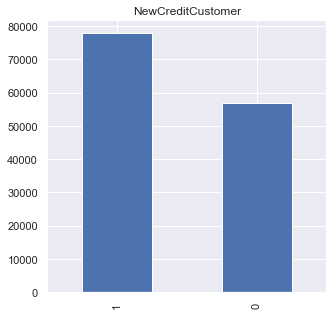

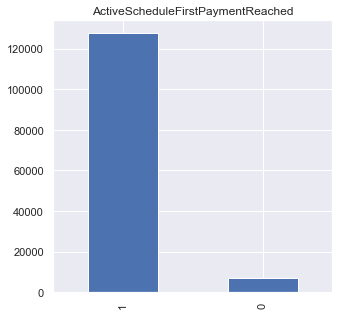

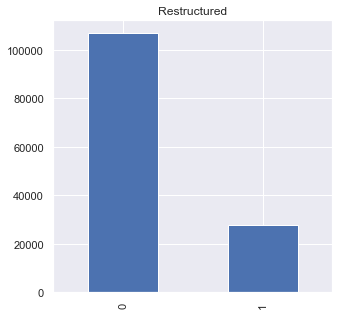

In [156]:
#plotting bool data
sns.set_theme(style="darkgrid")

features_bool_data= list(bool_data.columns)
features_bool_data_viz= ["NewCreditCustomer", "ActiveScheduleFirstPaymentReached","Restructured"]
for i in features_bool_data_viz:
    bool_data[i].value_counts().plot(kind='bar', figsize=(5,5))
    plt.title(i)
    plt.show()

In [157]:
#exploring features with wrong inputs and deal with it

In [158]:
num_cat['EmploymentStatus'].unique()

array([ 3., -1.,  2.,  4.,  5.,  6.,  0.])

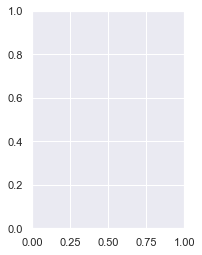

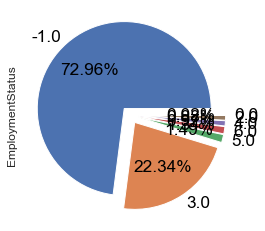

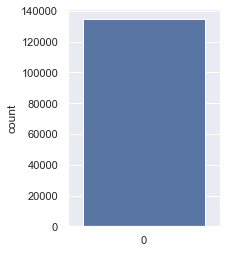

In [159]:
sns.set_theme(style="darkgrid")

plt.subplot(1,2,1)
plt.figure(figsize = (6, 4))

round(num_cat['EmploymentStatus'].value_counts()/num_cat.shape[0]*100,2).plot.pie( autopct = '%.2f%%',
        textprops = {'size' : 'x-large','color' : '0'},explode = (0.1, 0.1,0.1,0.1,0.1,0.1,0.1))

plt.figure(figsize = (6, 4))

plt.subplot(1,2,2)
sns.countplot(num_cat['EmploymentStatus'],palette='deep')
plt.show()

In [162]:
# drop feature because it contain large number of wrong values
num_cat=num_cat.drop('EmploymentStatus',axis=1)

KeyError: "['EmploymentStatus'] not found in axis"

In [163]:
num_cat

,Education,HomeOwnershipType,LanguageCode,MaritalStatus,UseOfLoan
0,3.0,2.0,1,1.0,7
1,5.0,2.0,1,4.0,7
2,4.0,2.0,1,1.0,2
3,2.0,2.0,1,3.0,0
4,4.0,2.0,1,2.0,6
...,...,...,...,...,...
134524,3.0,5.0,4,3.0,0
134525,3.0,1.0,4,3.0,2
134526,3.0,1.0,4,1.0,0
134527,5.0,4.0,1,1.0,7


In [164]:
num_cat['Education'].unique()

array([ 3.,  5.,  4.,  2.,  1.,  0., -1.])

Text(0.5, 1.0, 'Education')

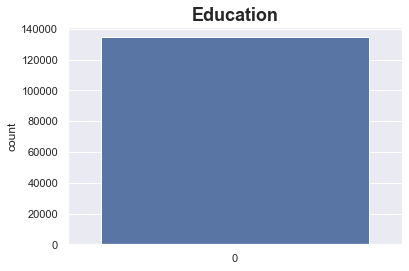

In [165]:
sns.set_theme(style="darkgrid")

sns.countplot(num_cat['Education'],palette='deep')
plt.title('Education', fontsize = 18, fontweight = 'bold')

In [166]:
bool_data['NewCreditCustomer']


0         1
1         0
2         1
3         1
4         1
         ..
134524    1
134525    0
134526    1
134527    0
134528    0
Name: NewCreditCustomer, Length: 134529, dtype: int64

In [167]:
num_cat['UseOfLoan'].unique()

array([  7,   2,   0,   6,   8,   3,   5,   4,   1, 110, 101, 102, 104,
       108, 106, 107,  -1], dtype=int64)

Text(0.5, 1.0, 'Use Of Loan')

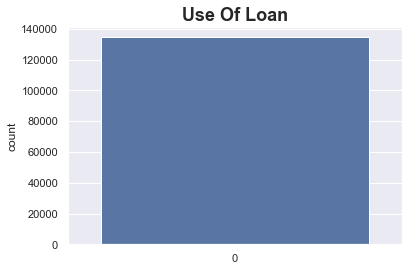

In [168]:
sns.set_theme(style="darkgrid")

sns.countplot(num_cat['UseOfLoan'],palette='deep')
plt.title('Use Of Loan', fontsize = 18, fontweight = 'bold')

In [169]:
num_cat=num_cat.drop('UseOfLoan',axis=1)

In [170]:
num_cat

,Education,HomeOwnershipType,LanguageCode,MaritalStatus
0,3.0,2.0,1,1.0
1,5.0,2.0,1,4.0
2,4.0,2.0,1,1.0
3,2.0,2.0,1,3.0
4,4.0,2.0,1,2.0
...,...,...,...,...
134524,3.0,5.0,4,3.0
134525,3.0,1.0,4,3.0
134526,3.0,1.0,4,1.0
134527,5.0,4.0,1,1.0


In [171]:
num_cat['MaritalStatus'].unique()


array([ 1.,  4.,  3.,  2.,  5.,  0., -1.])

Text(0.5, 1.0, 'Martial State')

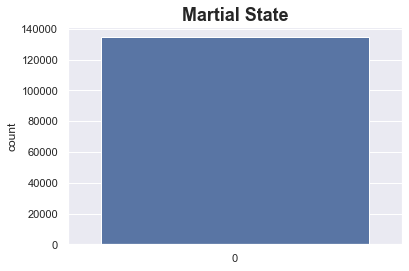

In [172]:
sns.set_theme(style="darkgrid")

sns.countplot(num_cat['MaritalStatus'], palette='deep')
plt.title('Martial State', fontsize = 18, fontweight = 'bold')

In [173]:
num_cat=num_cat.drop('MaritalStatus',axis=1)

In [174]:
num_cat['HomeOwnershipType'].unique()

array([ 2.,  0.,  4.,  1.,  3.,  5.,  8.,  6.,  7.,  9., 10., -1.])

Text(0.5, 1.0, 'Home Onwership Type')

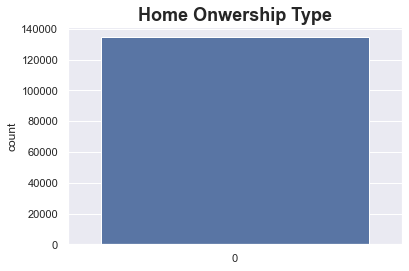

In [175]:
sns.set_theme(style="darkgrid")

sns.countplot(num_cat['HomeOwnershipType'],palette='deep')
plt.title('Home Onwership Type', fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, 'Language Code')

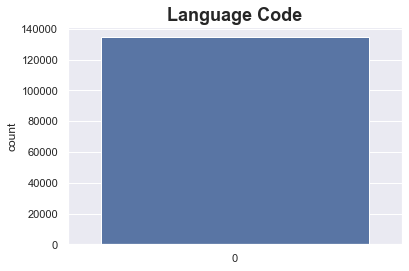

In [176]:
sns.set_theme(style="darkgrid")

sns.countplot(num_cat['LanguageCode'],palette='deep')
plt.title('Language Code', fontsize = 18, fontweight = 'bold')

<AxesSubplot: >

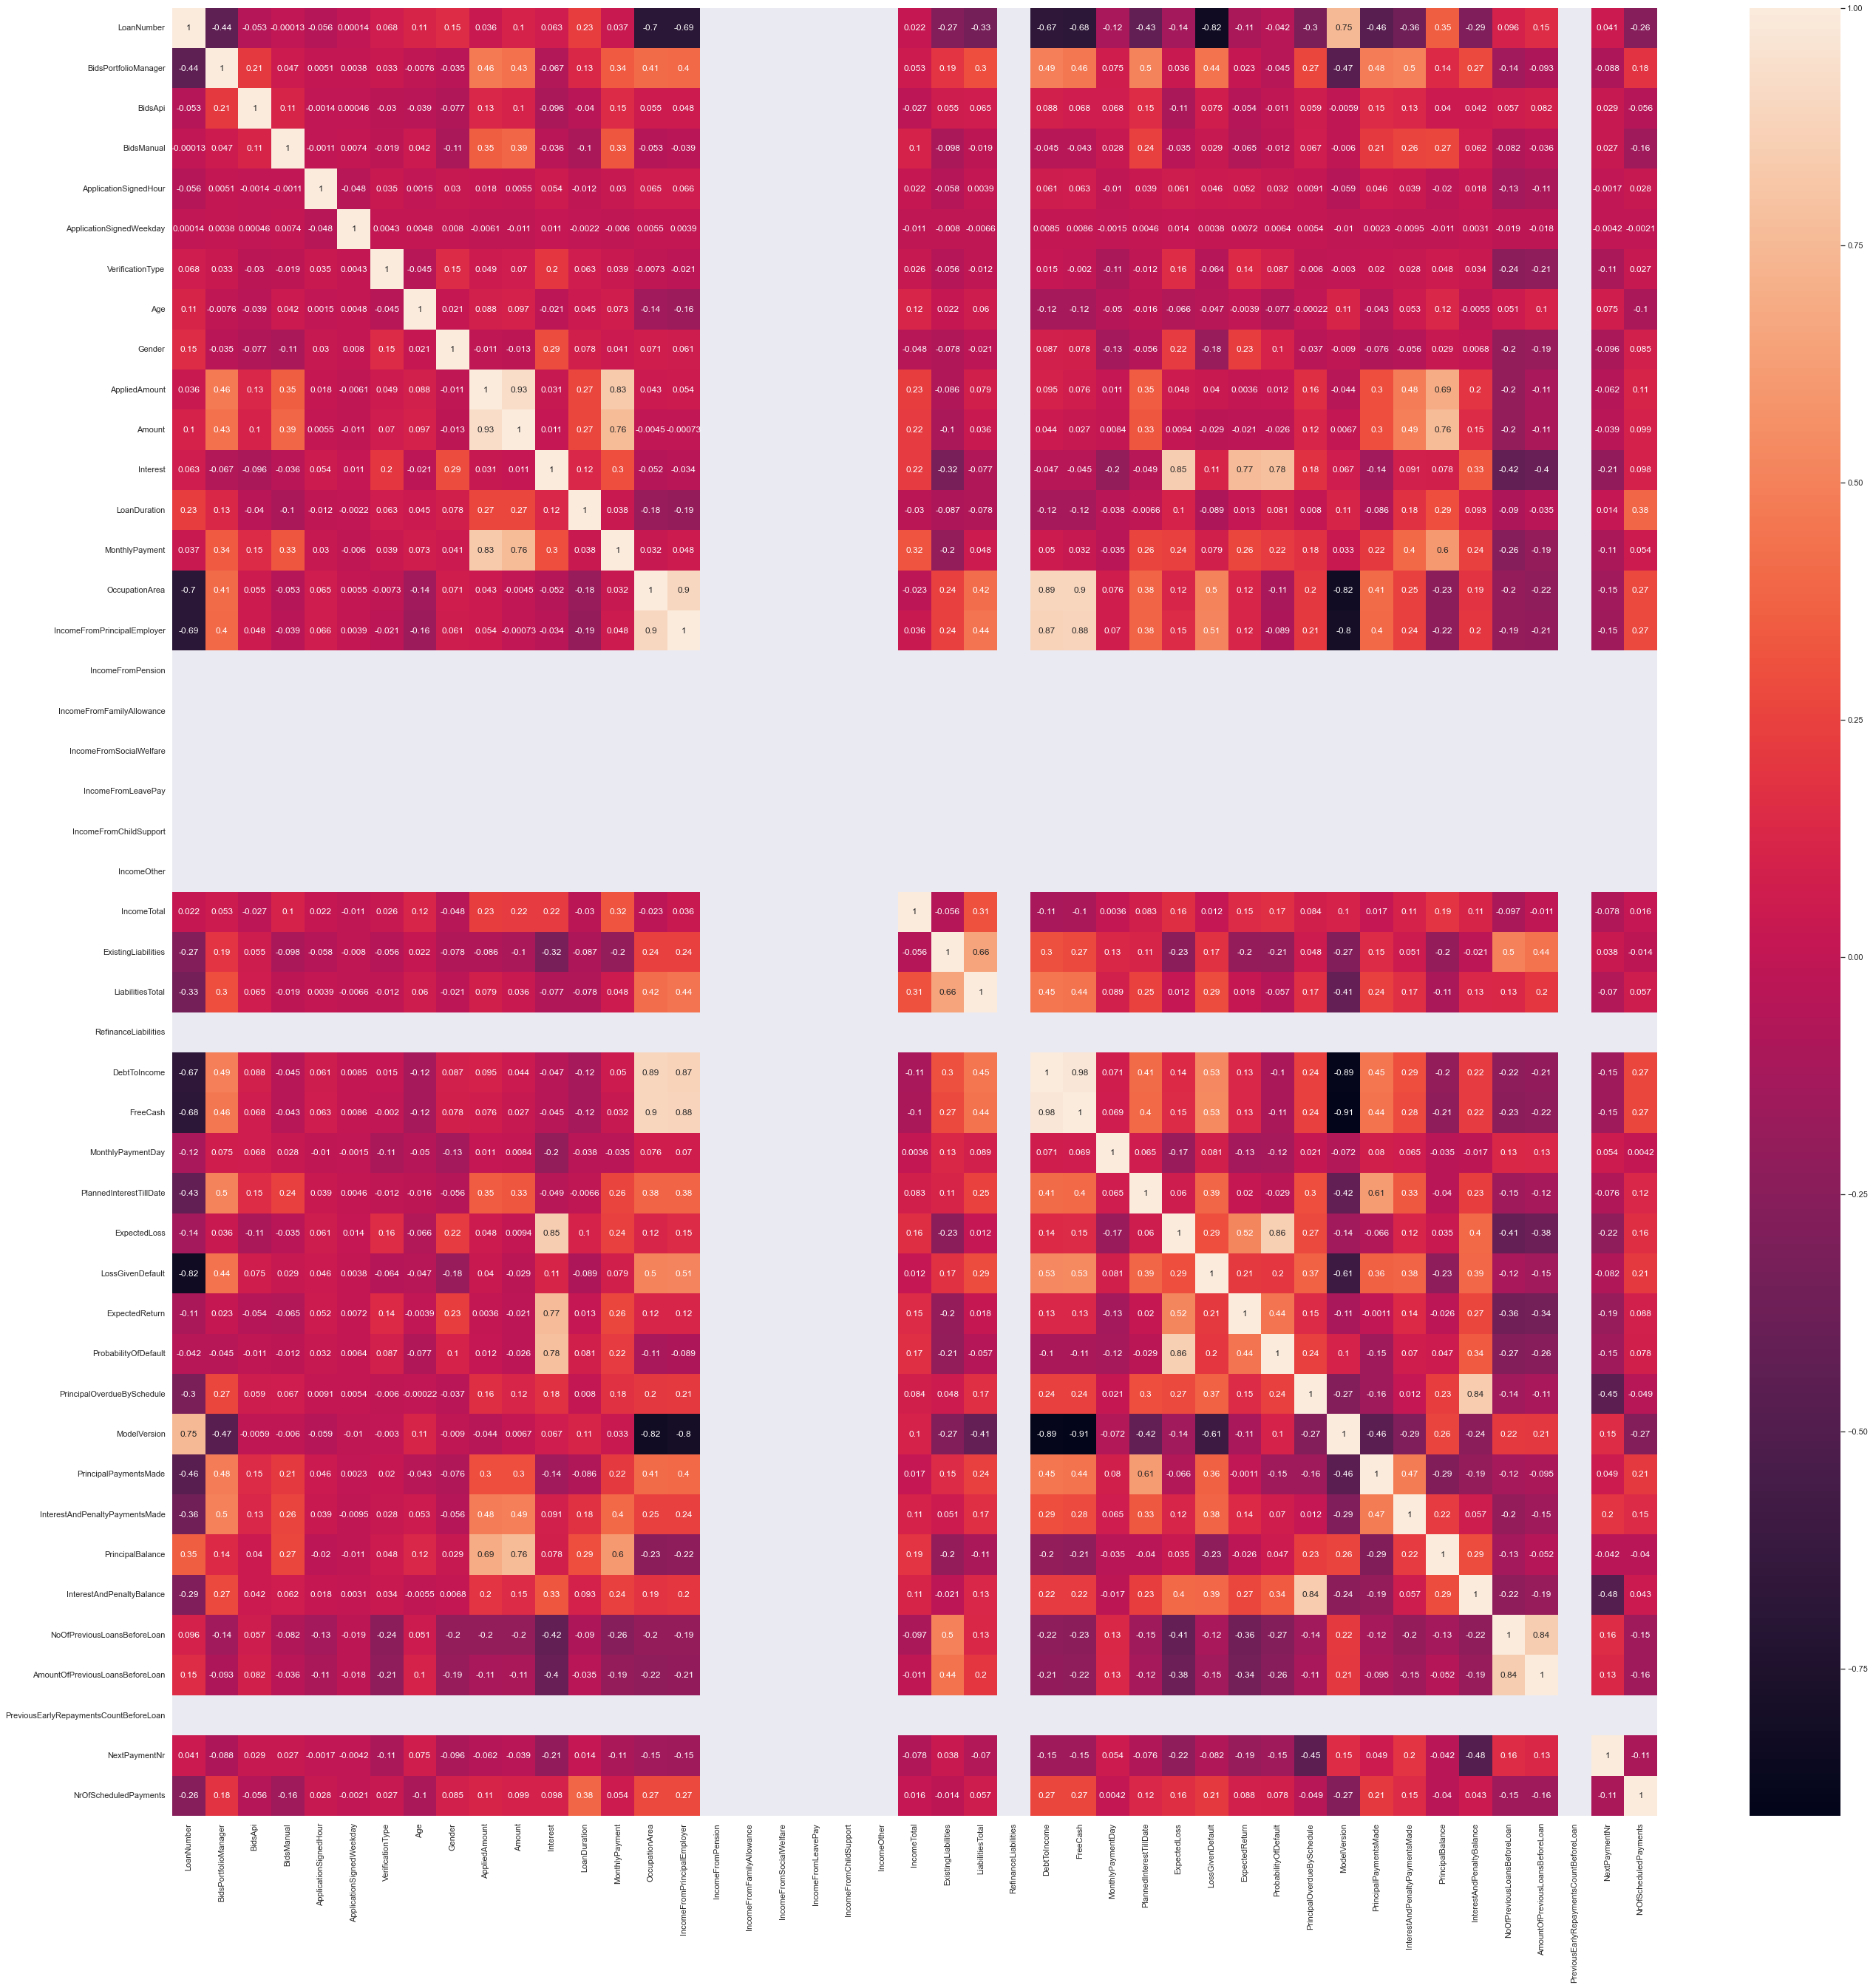

In [177]:
#corr between num features

plt.figure(figsize = (45, 45))

sns.heatmap(num_dataframe.corr(), annot=True)

<AxesSubplot: xlabel='Interest', ylabel='ProbabilityOfDefault'>

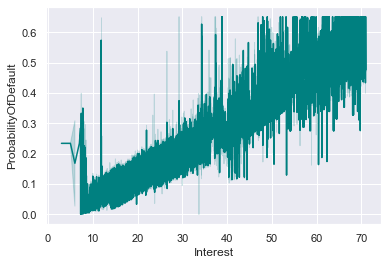

In [178]:
sns.set_theme(style="darkgrid")

sns.lineplot(x=num_dataframe['Interest'], y=num_dataframe['ProbabilityOfDefault'],color='teal')